In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import math
import scipy.stats as sps
from scipy.stats import norm
import seaborn as sns

*Задача 4.*

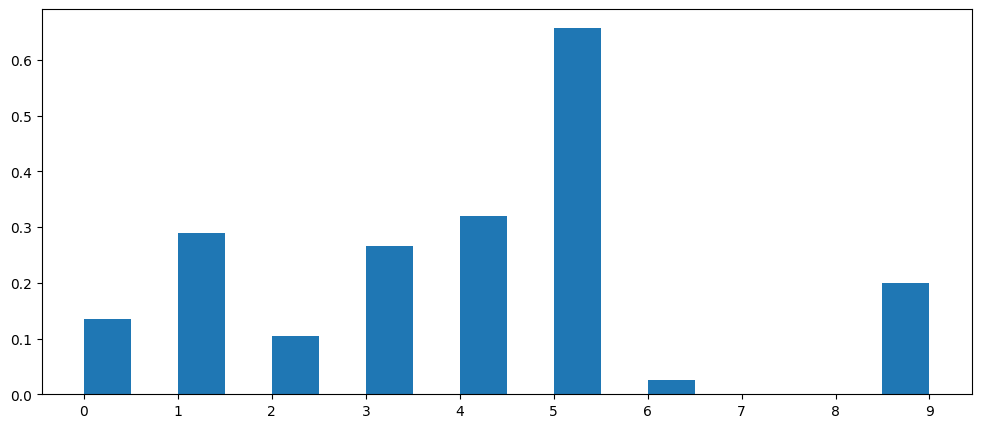

In [3]:
# моделирование выборки с весами
W = {0: 0.12, 1: 0.3, 2: 0.167, 3: 0.24, 4: 0.31, 5: 0.54, 6: 0.111, 7: 0.02, 8: 0.001, 9: 0.2}
sorted_W = {k: v for k, v in sorted(W.items(), key=lambda item: item[1], reverse=True)} # упорядочивание
A = list(sorted_W.values())
B = list(sorted_W.keys())
sum_weights = sum(A) # сумма весов
arr_weights = []
for i in range(len(A)):
    arr_weights.append(A[i] + sum(A[:i])) # веса с суммами
answer = []
for i in range(1000):
    x = np.random.rand()*sum_weights # равномерное от 0 до суммы весов
    if (x <= arr_weights[0]): 
        answer.append(B[0])
    for j in range(1, 9):
        if (x > arr_weights[j] and x <= arr_weights[j+1]):
            answer.append(B[j])
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(answer, bins=18, density=True)
plt.xticks(B)
fig.set_figwidth(12) 
fig.set_figheight(5)
plt.show()
# P.S. Попытался расширить гистограмму, но визуально цифра 8 осталось скрытой
del answer

*Задача 5.*

Генерация + функция распределения

Density function:


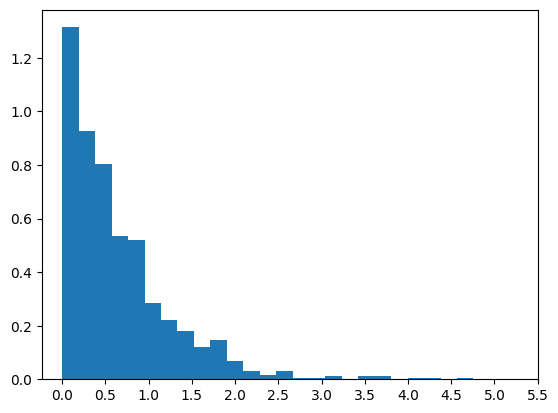

In [4]:
# Берем числа, равномерно распределенные на отрезке, применяем преобразование F^(-1)
def func(point, alpha=1.5):
    return (math.log(1-point))/(-1*alpha)
index = []
S = 0
for i in range(13):
    index.append(S)
    S += 0.5
answer = []
for i in range(1000):
    x = np.random.rand()
    answer.append(func(x))
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(answer, bins=25, density=True)
plt.xticks(np.arange(0, 6, step=0.5))
print("Density function:")
plt.show()

Закон распределения

Law of distribution:


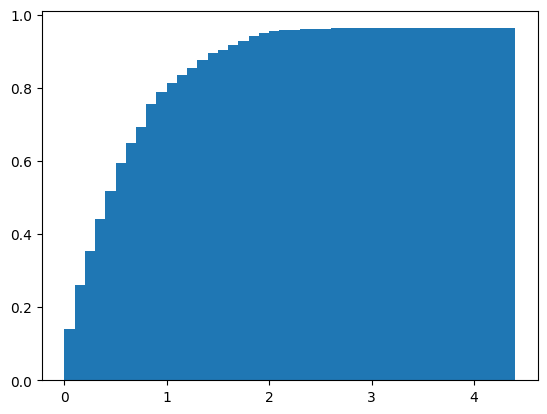

In [5]:
answer.sort()
y_points = []
x_points = np.arange(0, 5, step=0.1)
count = 0
tmp = 0.1
for i in range(1000):
    if (answer[i] < tmp):
        count += 1
        continue
    tmp += 0.1
    y_points.append(count*1.0/1000)
x_points = x_points[:len(y_points)]
plt.bar(x_points, y_points, align='edge')
print("Law of distribution:")
plt.show()
del answer

Задача 7.

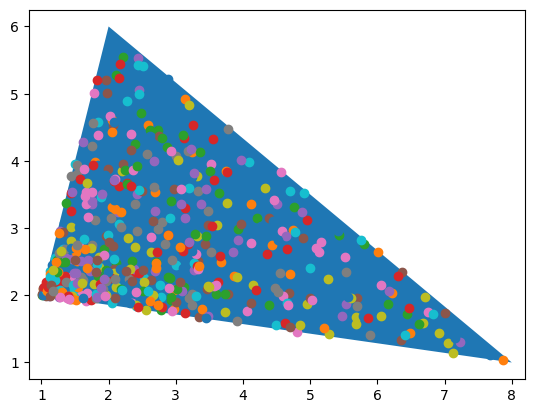

In [14]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

def function(p1, p2, p3, u, v): # преобразование, тесно связанное с геометрией барицентрических координат
    x = (1-u)*p1[0] + u*((1-v)*p2[0]+v*p3[0])
    y = (1-u)*p1[1] + u*((1-v)*p2[1]+v*p3[1])
    answer_ = [x, y]
    return answer_
    
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
polygon = Polygon(np.array([[1, 2], [2, 6], [8, 1]]),closed=True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.axis('equal')

p1 = [1, 2]
p2 = [2, 6]
p3 = [8, 1]
for i in range(500):
    u = np.random.rand()
    v = np.random.rand()
    point = function(p1, p2, p3, u, v)
    plt.scatter(point[0], point[1])
plt.show()

*Задача 8.*

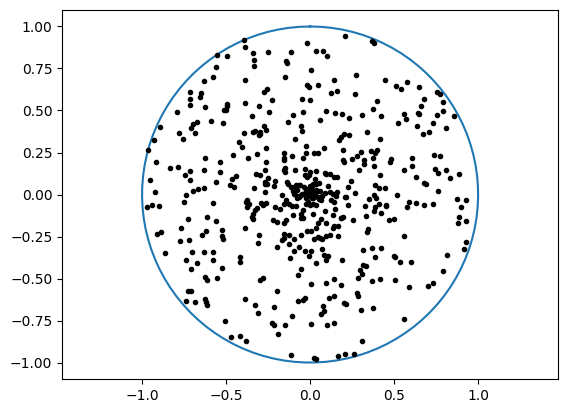

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
px = []
py = []

for i in range(500):
    angle = np.random.rand()*2*np.pi
    dist = np.random.rand()
    px.append(dist*np.cos(angle))
    py.append(dist*np.sin(angle))
plt.plot(px, py, ".k")
plt.show() # визуально не очень равномерно :/

*Задача 9.*

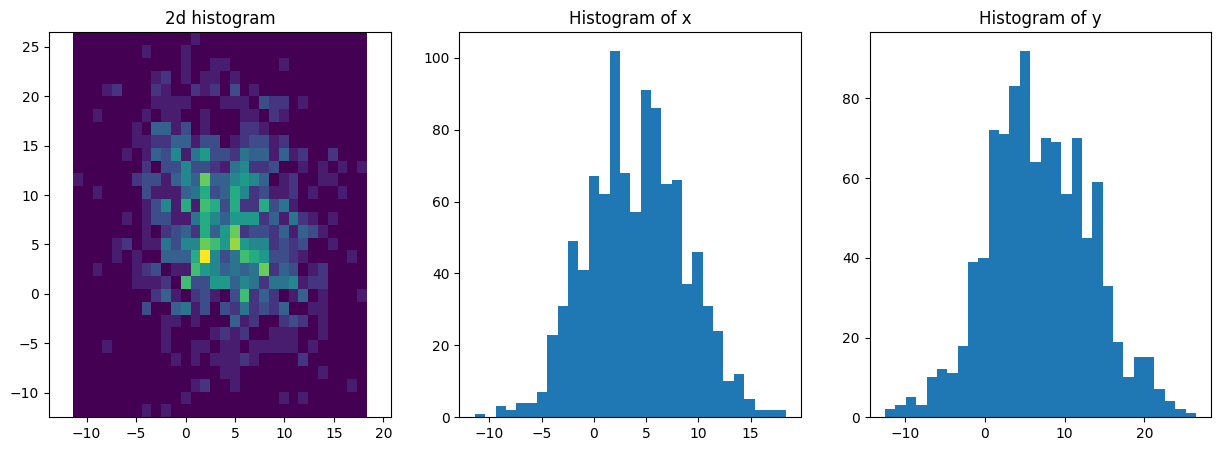

In [16]:
n = 1000 # полярная замена - отличный способ избавиться от тригонометрических функций

cov = np.array([[20, -4], [ -4, 40]])
mean = np.array([4, 7])
L = np.linalg.cholesky(cov) # метод Холецкого разложение матрицы 
L_T = L.T.conj()

u1, u2, s = np.random.rand(3, n)
u1 = u1*2-1
u2 = u2*2-1
x = []
y = []
# наиболее простой путь - моделировать стандартное распределение, и преобразованиями получить нужное
for i in range(n):
    R = u1[i]**2+u2[i]**2
    vec = np.array([u1[i] * math.sqrt(-2*math.log(s[i])/R), u2[i] * math.sqrt(-2*math.log(s[i])/R)])
    product = np.dot(L_T, vec)
    x.append(product[0] + mean[0]) # умножение транспонирванной матрицы на вектор, распределенным нормально, чтобы изменить ковариацию на данную
    y.append(product[1] + mean[1]) # прибавление среднего, чтобы изменить среднее значение на данное
    
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

Задача 6.

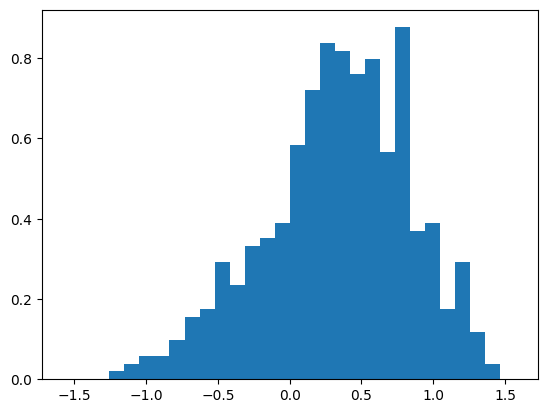

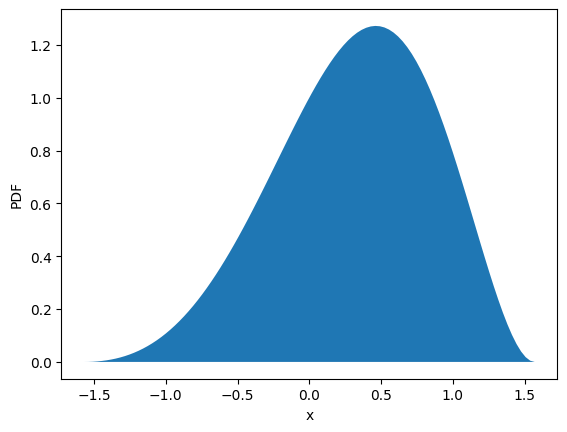

In [24]:
def func(x):
    return (1/math.sqrt(2*math.pi))*np.exp(-x*x/2) 
def init(x):
    return np.exp(x)*np.cos(x)**2 
    
y = np.arange(-math.pi/2, math.pi/2, 0.001)
k = max(init(y) / func(y))  


def sample(size):
    normal = np.random.normal(0, 1, size=size)
    unif = np.random.uniform(0, 1, size=size)
    mask = init(normal) / (k * func(normal)) > unif
    return normal[mask] 

samples = sample(1000)
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.hist(samples, 30, range = (-math.pi/2, math.pi/2),density=True)
plt.show()

fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

x = np.linspace(-math.pi/2, math.pi/2, 100)
density = np.exp(x)*np.cos(x)**2
plt.fill_between(x, 0, density) # заполнение
plt.ylabel('PDF')
plt.xlabel('x')
plt.show()